In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use("ggplot")
mpl.rcParams.update({"font.size": 16})

In [2]:
import numpy

In [3]:
import arviz as az

In [4]:
import pandas as pd

In [5]:
# data from https://www.datdota.com/splits/730
# cheers Noxville
df = pd.read_csv("datdota_The_International_2019.csv")

In [6]:
df.columns

Index(['Match', 'Date', 'Duration', 'Team', 'Picks', 'Bans', 'Team.1',
       'Picks.1', 'Bans.1', 'Winner'],
      dtype='object')

In [7]:
df.head()

Match               Date Duration         Team  \
0  4986461644  25 Aug 2019 01:50    24:34           OG   
1  4986362254  25 Aug 2019 12:54    23:23  Team Liquid   
2  4986260666  25 Aug 2019 11:51    32:25  Team Liquid   
3  4986133311  25 Aug 2019 10:33    48:34  Team Liquid   
4  4985891168  25 Aug 2019 08:12    36:34      PSG.LGD   

                                               Picks  \
0           Io  Tiny  Abaddon  Timbersaw  Gyrocopter   
1  Rubick  Tidehunter  Ogre Magi  Templar Assassi...   
2  Tidehunter  Templar Assassin  Shadow Shaman  L...   
3  Tidehunter  Chen  Rubick  Templar Assassin  Meepo   
4  Elder Titan  Rubick  Faceless Void  Shadow Fie...   

                                                Bans       Team.1  \
0  Leshrac  Dark Seer  Enchantress  Meepo  Ember ...  Team Liquid   
1  Magnus  Ancient Apparition  Io  Ember Spirit  ...           OG   
2  Magnus  Ancient Apparition  Io  Invoker  Dark ...           OG   
3  Magnus  Io  Alchemist  Invoker  Ember Spirit  ...           OG   
4  Alchemist  Chen  Enchantress  Io  Naga Siren  ...  Team Liquid   

                                             Picks.1  \
0  Chen  Omniknight  Bristleback  Earth Spirit  W...   
1  Enchantress  Tiny  Grimstroke  Faceless Void  ...   
2  Grimstroke  Tiny  Ember Spirit  Omniknight  Mo...   
3    Enchantress   Elder Titan  Tiny  Spectre  Pugna   
4  Tidehunter  Templar Assassin  Shadow Shaman  W...   

                                              Bans.1       Winner  
0  Magnus  Alchemist  Elder Titan  Troll Warlord ...           OG  
1  Leshrac  Alchemist  Chen  Meepo  Naga Siren  W...           OG  
2      Leshrac  Alchemist  Chen  Rubick  Meepo  Puck           OG  
3  Leshrac  Ancient Apparition  Sand King  Tusk  ...  Team Liquid  
4  Leshrac  Ogre Magi  Centaur Warrunner  Kunkka ...  Team Liquid

In [8]:
len(df)

193

In [9]:
df['Team'].unique()

array(['OG', 'Team Liquid', 'PSG.LGD', 'Team Secret', 'Vici Gaming',
       'Infamous Gaming', 'Royal Never Give Up', 'Evil Geniuses',
       'Mineski', 'Newbee', 'TNC Predator', 'Natus Vincere',
       'KEEN GAMING', 'Virtus.pro', 'Ninjas in Pyjamas', 'Fnatic',
       'Alliance', 'Chaos EC'], dtype=object)

In [10]:
df['Team'].unique().shape

(18,)

In [11]:
len(df["Bans"][0].split("  "))

6

In [16]:
# check that we have found 5 picks per team
numpy.testing.assert_equal([True]*len(df), [len(pick.split(" "*2)) == 5 for pick in df["Picks"]])

In [17]:
# check that we have found 5 picks per team
numpy.testing.assert_equal([True]*len(df), [len(pick.split(" "*2)) == 5 for pick in df["Picks.1"]])

In [18]:
# check that we have found 6 bans per team
numpy.testing.assert_equal([True]*len(df), [len(ban.split(" "*2)) == 6 for ban in df["Bans"]])

In [19]:
# check that we have found 6 bans per team
numpy.testing.assert_equal([True]*len(df), [len(ban.split(" "*2)) == 6 for ban in df["Bans.1"]])

AssertionError: 
Items are not equal:
item=43

 ACTUAL: True
 DESIRED: False

In [20]:
# hmmm Bans.1 failed

In [21]:
for i, ban in enumerate(df["Bans.1"]):
    if len(ban.split(" "*2)) != 6:
        print(i, ban)

43 Enchantress  Elder Titan  Mirana  Wraith King  Alchemist


In [22]:
df.iloc[43]

Match                                              4977207666
Date                                        20 Aug 2019 12:12
Duration                                                43:17
Team                                      Royal Never Give Up
Picks       Leshrac  Abaddon  Shadow Demon  Ember Spirit  ...
Bans        Lina  Morphling  Enigma  Ancient Apparition  B...
Team.1                                               Alliance
Picks.1     Dark Willow  Faceless Void  Crystal Maiden  St...
Bans.1      Enchantress  Elder Titan  Mirana  Wraith King ...
Winner                                    Royal Never Give Up
Name: 43, dtype: object

In [5]:
import datetime

In [24]:
(datetime.datetime.strptime(df["Duration"][0], "%M:%S") - datetime.datetime(1900, 1, 1)).total_seconds()

1474.0

In [25]:
(datetime.datetime.strptime(df["Duration"][0], "%M:%S") - datetime.datetime(1900, 1, 1))

datetime.timedelta(seconds=1474)

In [26]:
def convert_time(t):
    """
    t = '15:30'
    or
    t = '1:15:30'
    https://www.kite.com/python/answers/how-to-convert-a-time-string-to-seconds-in-python
    """
    try:
        return (datetime.datetime.strptime(t, "%M:%S") - datetime.datetime(1900, 1, 1)).total_seconds()
    except ValueError:
        return (datetime.datetime.strptime(t, "%H:%M:%S") - datetime.datetime(1900, 1, 1)).total_seconds()

In [27]:
df["Duration"][18]

'1:18:05'

In [28]:
# for i, t in enumerate(df["Duration"]):
#     print(i, convert_time(t) )

In [29]:
df["Duration"] = [convert_time(t) for t in df["Duration"]]

Text(0.5, 1.0, 'Game Durations')

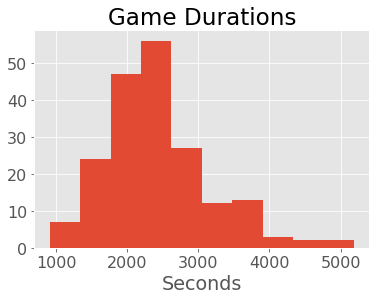

In [30]:
plt.figure()
plt.hist(df["Duration"])
plt.xlabel("Seconds")
plt.title("Game Durations")

In [31]:
df["Duration_mins"] = df["Duration"]/60

Text(0.5, 1.0, 'Game Durations')

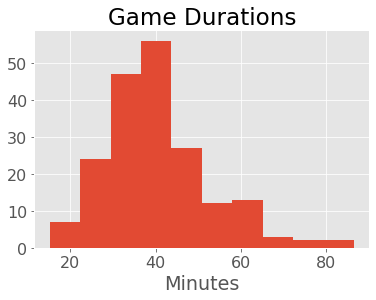

In [32]:
plt.figure()
plt.hist(df["Duration_mins"])
plt.xlabel("Minutes")
plt.title("Game Durations")

In [33]:
# which teams had games less than 25mins

In [34]:
df_short = df[df["Duration_mins"] < 25]

In [35]:
df_short[["Team", "Team.1"]]

Team             Team.1
0                     OG        Team Liquid
1            Team Liquid                 OG
10               PSG.LGD                 OG
12           Team Secret        Vici Gaming
13           Vici Gaming        Team Secret
55   Royal Never Give Up    Infamous Gaming
64              Chaos EC        Team Secret
72       Infamous Gaming  Ninjas in Pyjamas
95           Team Secret            Mineski
101           Virtus.pro                 OG
107              PSG.LGD            Mineski
139          KEEN GAMING        Team Secret
144               Newbee            PSG.LGD
164                   OG    Infamous Gaming
171          Team Liquid           Chaos EC
187          Team Secret           Alliance

In [36]:
df_short["Team"].value_counts()

Team Secret            3
OG                     2
Team Liquid            2
PSG.LGD                2
Vici Gaming            1
Royal Never Give Up    1
Chaos EC               1
Infamous Gaming        1
Virtus.pro             1
KEEN GAMING            1
Newbee                 1
Name: Team, dtype: int64

In [37]:
df_short["Team.1"].value_counts()

OG                   3
Team Secret          3
Infamous Gaming      2
Mineski              2
Team Liquid          1
Vici Gaming          1
Ninjas in Pyjamas    1
PSG.LGD              1
Chaos EC             1
Alliance             1
Name: Team.1, dtype: int64

In [38]:
# not sure how to combine these two columns

In [39]:
(df_short["Team"].append(df_short["Team.1"])).value_counts()

Team Secret            6
OG                     5
Team Liquid            3
PSG.LGD                3
Infamous Gaming        3
Vici Gaming            2
Chaos EC               2
Mineski                2
Royal Never Give Up    1
Virtus.pro             1
KEEN GAMING            1
Newbee                 1
Ninjas in Pyjamas      1
Alliance               1
dtype: int64

# lets try a hierarchical model to parameterise a team's strength

In [40]:
# teams
teams = df["Team"].unique()

In [41]:
teams

array(['OG', 'Team Liquid', 'PSG.LGD', 'Team Secret', 'Vici Gaming',
       'Infamous Gaming', 'Royal Never Give Up', 'Evil Geniuses',
       'Mineski', 'Newbee', 'TNC Predator', 'Natus Vincere',
       'KEEN GAMING', 'Virtus.pro', 'Ninjas in Pyjamas', 'Fnatic',
       'Alliance', 'Chaos EC'], dtype=object)

In [42]:
# number of teams
nt = len(teams)

In [43]:
# number of games
ng = len(df)

In [44]:
print(f"nt: {nt}")
print(f"ng: {ng}")

nt: 18
ng: 193


In [45]:
df.columns

Index(['Match', 'Date', 'Duration', 'Team', 'Picks', 'Bans', 'Team.1',
       'Picks.1', 'Bans.1', 'Winner', 'Duration_mins'],
      dtype='object')

In [49]:
# convert team names for each match into numbers

# for each team we assign an integer
# this dictionary is a map between the team name and it's number
team_number_dict = {k:i for i, k in enumerate(teams)}


# this is from ../hierarchical-premier-league/dev.ipynb
# home team will be radient
# away team will be dire

# "Team" col is radient
# "Team.1" col is dire


# home team index
# will be an array of length ng (number of games)
# it indexes which team played home in each game
ht = []
for home_team in df["Team"]:
    ht.append(team_number_dict[home_team])
ht = numpy.array(ht)

# same for away team
# it indexes which team played away in each game
at = []
for away_team in df["Team.1"]:
    at.append(team_number_dict[away_team])
at = numpy.array(at)

In [50]:
df["Team"].unique().shape

(18,)

In [51]:
df["Team.1"].unique().shape

(18,)

In [52]:
team_number_dict

{'OG': 0,
 'Team Liquid': 1,
 'PSG.LGD': 2,
 'Team Secret': 3,
 'Vici Gaming': 4,
 'Infamous Gaming': 5,
 'Royal Never Give Up': 6,
 'Evil Geniuses': 7,
 'Mineski': 8,
 'Newbee': 9,
 'TNC Predator': 10,
 'Natus Vincere': 11,
 'KEEN GAMING': 12,
 'Virtus.pro': 13,
 'Ninjas in Pyjamas': 14,
 'Fnatic': 15,
 'Alliance': 16,
 'Chaos EC': 17}

In [54]:
# to get a the results of all the games where OG was either radient or dire i.e. all OG games do this:
mask = numpy.where( (ht==team_number_dict["OG"]) | (at==team_number_dict["OG"]) )[0]
df.loc[ mask ]

Match               Date  Duration                 Team  \
0    4986461644  25 Aug 2019 01:50    1474.0                   OG   
1    4986362254  25 Aug 2019 12:54    1403.0          Team Liquid   
2    4986260666  25 Aug 2019 11:51    1945.0          Team Liquid   
3    4986133311  25 Aug 2019 10:33    2914.0          Team Liquid   
9    4983800597  24 Aug 2019 08:45    2509.0                   OG   
10   4983729131  24 Aug 2019 07:51    1347.0              PSG.LGD   
11   4983628610  24 Aug 2019 06:19    2687.0                   OG   
20   4981028582  22 Aug 2019 04:52    1674.0                   OG   
21   4980888053  22 Aug 2019 03:35    2523.0                   OG   
22   4980773381  22 Aug 2019 02:32    1844.0        Evil Geniuses   
38   4978435281  21 Aug 2019 05:22    2053.0               Newbee   
39   4978383071  21 Aug 2019 04:18    1653.0               Newbee   
49   4973348952  18 Aug 2019 09:28    2312.0                   OG   
51   4973241356  18 Aug 2019 08:16    2372.0          Vici Gaming   
78   4971649432  17 Aug 2019 12:52    2166.0               Fnatic   
82   4971535610  17 Aug 2019 11:36    2347.0               Fnatic   
97   4971147140  17 Aug 2019 07:08    1996.0           Virtus.pro   
101  4971088106  17 Aug 2019 06:16    1294.0           Virtus.pro   
114  4969840552  16 Aug 2019 01:58    2607.0  Royal Never Give Up   
119  4969740895  16 Aug 2019 12:50    1857.0  Royal Never Give Up   
132  4969485474  16 Aug 2019 09:17    1801.0    Ninjas in Pyjamas   
134  4969405883  16 Aug 2019 08:01    2472.0    Ninjas in Pyjamas   
148  4969232153  16 Aug 2019 04:26    2147.0                   OG   
151  4969185930  16 Aug 2019 03:15    1935.0                   OG   
164  4968053464  15 Aug 2019 12:06    1179.0                   OG   
168  4967969353  15 Aug 2019 10:55    1986.0      Infamous Gaming   
177  4967784803  15 Aug 2019 08:02    2655.0        Natus Vincere   
181  4967721543  15 Aug 2019 06:52    2353.0        Natus Vincere   

                                                 Picks  \
0             Io  Tiny  Abaddon  Timbersaw  Gyrocopter   
1    Rubick  Tidehunter  Ogre Magi  Templar Assassi...   
2    Tidehunter  Templar Assassin  Shadow Shaman  L...   
3    Tidehunter  Chen  Rubick  Templar Assassin  Meepo   
9    Chen  Alchemist  Tidehunter  Rubick  Legion Co...   
10   Shadow Demon  Sand King  Jakiro  Sven  Dragon ...   
11   Elder Titan  Faceless Void  Pangolier  Nature'...   
20   Enchantress  Invoker  Rubick  Juggernaut  Sand...   
21   Enchantress  Earthshaker  Faceless Void  Tiny ...   
22   Enchantress  Earth Spirit  Crystal Maiden  Ter...   
38   Enchantress  Shadow Demon  Earthshaker  Ember ...   
39   Visage  Tiny  Beastmaster  Grimstroke  Lifeste...   
49   Omniknight  Invoker  Gyrocopter  Elder Titan  ...   
51    Alchemist  Abaddon  Crystal Maiden  Tiny  Mirana   
78   Elder Titan  Crystal Maiden  Ember Spirit  Tim...   
82   Magnus  Crystal Maiden  Bloodseeker  Ember Spi...   
97   Shadow Demon  Leshrac  Lina  Tidehunter  Drago...   
101  Omniknight  Leshrac  Ancient Apparition  Sven ...   
114  Shadow Demon  Alchemist  Jakiro  Kunkka  Sand ...   
119  Ancient Apparition  Sand King  Ember Spirit  P...   
132   Mirana  Ogre Magi  Lion  Lone Druid  Wraith King   
134    Mirana  Elder Titan  Slark  Sand King  Batrider   
148  Magnus  Juggernaut  Grimstroke  Pugna  Earthsh...   
151  Chen  Alchemist  Grimstroke  Ember Spirit  San...   
164               Magnus  Invoker  Oracle  Slark  Tiny   
168  Tiny  Silencer  Jakiro  Queen of Pain  Wraith ...   
177  Treant Protector  Ancient Apparition  Sven  Le...   
181  Warlock  Shadow Demon  Axe  Bloodseeker  Storm...   

                                                  Bans           Team.1  \
0    Leshrac  Dark Seer  Enchantress  Meepo  Ember ...      Team Liquid   
1    Magnus  Ancient Apparition  Io  Ember Spirit  ...               OG   
2    Magnus  Ancient Apparition  Io  Invoker  Dark ...               OG   
3    Magnus  Io  Alchemis

In [55]:
df["Winner"]

0                OG
1                OG
2                OG
3       Team Liquid
4       Team Liquid
           ...     
188         PSG.LGD
189     Team Secret
190          Newbee
191         PSG.LGD
192    TNC Predator
Name: Winner, Length: 193, dtype: object

In [56]:
# need to encoder the winner
# `radiantWin` will be the variable
# 1 for radiant, 0 for dire
radiantWin = []
for i in range(len(df)):
    rad_team = df["Team"][i]
    dire_team = df["Team.1"][i]
    if df["Winner"][i] == rad_team:
        radiantWin.append(1)
    elif df["Winner"][i] == dire_team:
        radiantWin.append(0)
    else:
        print(f"case: {i} error")
        print(rad_team)
        print(dire_team)
        print(df["Winner"][i])
    

In [57]:
df["radiantWin"] = radiantWin

In [58]:
df

Match               Date  Duration         Team  \
0    4986461644  25 Aug 2019 01:50    1474.0           OG   
1    4986362254  25 Aug 2019 12:54    1403.0  Team Liquid   
2    4986260666  25 Aug 2019 11:51    1945.0  Team Liquid   
3    4986133311  25 Aug 2019 10:33    2914.0  Team Liquid   
4    4985891168  25 Aug 2019 08:12    2194.0      PSG.LGD   
..          ...                ...       ...          ...   
188  4967642360  15 Aug 2019 05:03    2092.0     Chaos EC   
189  4967602648  15 Aug 2019 04:03    2682.0  Team Secret   
190  4967601727  15 Aug 2019 04:02    2873.0  Team Liquid   
191  4967601481  15 Aug 2019 04:01    1667.0      PSG.LGD   
192  4967600837  15 Aug 2019 04:01    3193.0  KEEN GAMING   

                                                 Picks  \
0             Io  Tiny  Abaddon  Timbersaw  Gyrocopter   
1    Rubick  Tidehunter  Ogre Magi  Templar Assassi...   
2    Tidehunter  Templar Assassin  Shadow Shaman  L...   
3    Tidehunter  Chen  Rubick  Templar Assassin  Meepo   
4    Elder Titan  Rubick  Faceless Void  Shadow Fie...   
..                                                 ...   
188           Grimstroke  Dazzle  Tiny  Spectre  Lycan   
189  Kunkka  Jakiro  Elder Titan  Broodmother  Arc ...   
190     Beastmaster  Zeus  Alchemist  Ogre Magi  Viper   
191  Ogre Magi  Shadow Demon  Naga Siren  Jakiro  S...   
192  Ancient Apparition  Ember Spirit  Rubick  Life...   

                                                  Bans        Team.1  \
0    Leshrac  Dark Seer  Enchantress  Meepo  Ember ...   Team Liquid   
1    Magnus  Ancient Apparition  Io  Ember Spirit  ...            OG   
2    Magnus  Ancient Apparition  Io  Invoker  Dark ...            OG   
3    Magnus  Io  Alchemist  Invoker  Ember Spirit  ...            OG   
4    Alchemist  Chen  Enchantress  Io  Naga Siren  ...   Team Liquid   
..                                                 ...           ...   
188  Enchantress  Leshrac  Warlock  Naga Siren  Anc...       PSG.LGD   
189  Lina  Shadow Demon  Ancient Apparition  Slark ...      Alliance   
190  Omniknight  Enchantress  Leshrac  Chen  Timber...        Newbee   
191  Enchantress  Enigma  Chen  Broodmother  Lifest...      Chaos EC   
192  Chen  Enigma  Oracle  Outworld Devourer  Shado...  TNC Predator   

                                               Picks.1  \
0    Chen  Omniknight  Bristleback  Earth Spirit  W...   
1    Enchantress  Tiny  Grimstroke  Faceless Void  ...   
2    Grimstroke  Tiny  Ember Spirit  Omniknight  Mo...   
3      Enchantress   Elder Titan  Tiny  Spectre  Pugna   
4    Tidehunter  Templar Assassin  Shadow Shaman  W...   
..                                                 ...   
188  Elder Titan  Sand King  Mirana  Lifestealer  P...   
189  Ogre Magi  Dark Willow  Oracle  Death Prophet ...   
190  Mirana  Ember Spirit  Sven  Tidehunter  Ancien...   
191  Elder Titan  Grimstroke  Sven  Underlord  Necr...   
192  Mirana  Kunkka  Grimstroke  Bristleback  Arc W...   

                                                Bans.1        Winner  \
0    Magnus  Alchemist  Elder Titan  Troll Warlord ...            OG   
1    Leshrac  Alchemist  Chen  Meepo  Naga Siren  W...            OG   
2        Leshrac  Alchemist  Chen  Rubick  Meepo  Puck            OG   
3    Leshrac  Ancient Apparition  Sand King  Tusk  ...   Team Liquid   
4    Leshrac  Ogre Magi  Centaur Warrunner  Kunkka ...   Team Liquid   
..                                                 ...           ...   
188  Chen  Enigma  Shadow Demon  Alchemist  Broodmo...       PSG.LGD   
189  Enchantress  Techies  Alchemist  Naga Siren  E...   Team Secret   
190  Io  Broodmother  Magnus  Puck  Outworld Devour...        Newbee   
191  Leshrac  Mirana  Ancient Apparition  Alchemist...       PSG.LGD   
192  Ogre Magi  Enchantress  Alchemist  Tidehunter ...  TNC Predator   

     Duration_mins  radiantWin  
0        24.566667           1  
1        23.383333           0  
2        32.416667           0  
3        48.566667   

In [59]:
n_radiant_wins = sum((df["radiantWin"] == 1))

In [60]:
n_dire_wins = sum((df["radiantWin"] == 0))

In [61]:
n_radiant_wins/ng * 100

46.1139896373057

In [62]:
n_dire_wins/ng * 100

53.8860103626943

In [63]:
# set up data
# we will reserve the last 5 elements for prediction/testing

np = 5
ngob = ng - np

datadict = {}

# number of predictions
datadict['np'] = np
datadict['ngob'] = ngob
datadict['nt'] = nt
datadict['ng'] = ng
datadict['ht'] = ht[:ngob]
datadict['at'] = at[:ngob]
datadict['radiantWin'] = df["radiantWin"][:ngob].to_numpy()
datadict['htnew'] = ht[ngob:]
datadict['atnew'] = at[ngob:]

In [64]:
datadict

{'np': 5,
 'ngob': 188,
 'nt': 18,
 'ng': 193,
 'ht': array([ 0,  1,  1,  1,  2,  1,  1,  3,  1,  0,  2,  0,  3,  4,  1,  1,  3,
         5,  1,  6,  0,  0,  7,  4,  4,  8,  8,  8,  9,  5,  9,  1, 10,  6,
         6,  3,  7,  3,  9,  9, 11, 12,  1,  6, 10, 10, 10, 13,  2,  0, 14,
         4,  6, 15, 14,  6, 10, 15, 16,  9,  3,  2,  1,  8, 17, 15,  4,  7,
        14,  6, 13, 11,  5,  3,  1,  3,  9,  8, 15,  9, 12, 16, 15,  6, 14,
         5, 11,  4, 13, 10, 16, 12,  8,  1, 10,  3,  9, 13, 14,  5, 15, 13,
        14, 15,  5, 16, 10,  2, 17,  8,  9, 12, 10,  7,  6, 11, 15,  4, 14,
         6, 15,  1,  9, 16,  8, 12,  1, 10, 17, 11,  6,  4, 14,  7, 14, 13,
         4, 16,  1, 12,  9,  1,  3, 16,  9, 14, 11, 13,  0, 11, 15,  0,  4,
        10, 12,  8, 10, 17,  1, 15,  3,  7, 17,  4,  0, 13, 11,  9,  5,  8,
         6,  1,  3, 12, 10,  1, 12, 11, 14,  4, 15, 11, 13,  6, 15, 12,  9,
         3]),
 'at': array([ 1,  0,  0,  0,  1,  2,  2,  1,  3,  2,  0,  2,  4,  3,  7,  7,  5,
         3,  6,

In [65]:
len(datadict['ht'])+len(datadict['htnew'])

193

In [66]:
len(datadict['at'])+len(datadict['atnew'])

193

## pymc model - simple model first - "coin toss" -> "radiant win/loss"

In [10]:
import pymc3 as pm

In [11]:
import theano.tensor as tt

In [69]:
# idea: could do a model of probability of radiant win or loss
# this is basically a coin toss
# https://discourse.pymc.io/t/revisiting-the-coin-flipping-problem/2714

In [70]:
with pm.Model() as model:
    p = pm.Uniform('p', lower=0, upper=1)
    
    one_minus_p = pm.Deterministic(name='notp', var=1-p)
    
    y = pm.Bernoulli('y', p=p, observed=datadict['radiantWin'])

In [71]:
model

In [72]:
with model:
    trace = pm.sample(1000, tune=1000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 6 seconds.


/Users/spx8sk/anaconda3/envs/bayesian-hackers/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


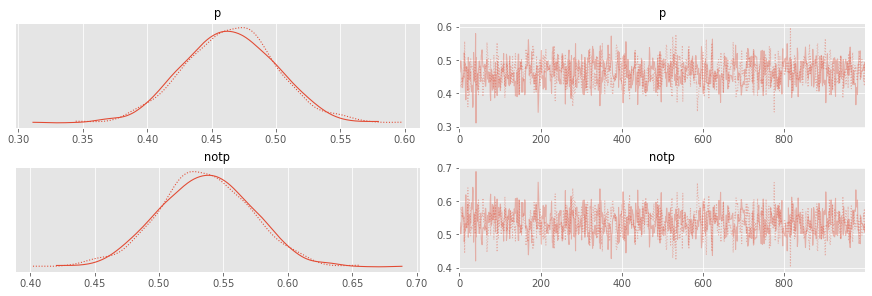

In [73]:
pm.traceplot(trace);

In [74]:
bfmi = max(pm.stats.bfmi(trace))
max_gr = max(numpy.max(gr_stats) for gr_stats in pm.stats.rhat(trace).values()).values

/Users/spx8sk/anaconda3/envs/bayesian-hackers/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


In [75]:
bfmi

1.1946358649901387

In [76]:
max_gr

array(1.00283944)

/Users/spx8sk/anaconda3/envs/bayesian-hackers/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


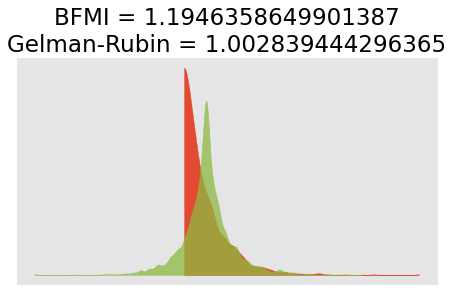

In [77]:
(
    pm.energyplot(trace, legend=False, figsize=(6, 4)).set_title(
        f"BFMI = {bfmi}\nGelman-Rubin = {max_gr}"
    )
);

In [78]:
hdi_p = az.stats.hdi(trace["p"])
hdi_notp = az.stats.hdi(trace["notp"])

In [79]:
hdi_p

array([0.39780722, 0.53214685])

In [80]:
hdi_notp

array([0.46785315, 0.60219278])

In [81]:
p_median = numpy.quantile(trace["p"], 0.5, axis=0)

In [82]:
notp_median = numpy.quantile(trace["notp"], 0.5, axis=0)

Text(0.5, 1.0, 'posterior probability of Radiant Win at Ti9\n$p = 0.46^{+{0.07}}_{-{0.07}}$')

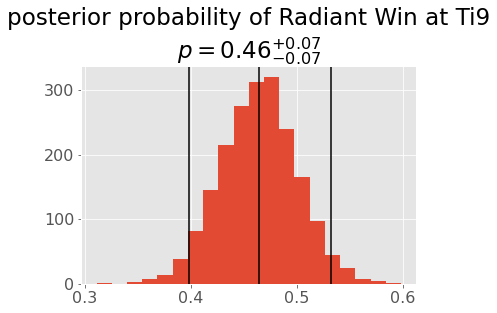

In [83]:
plt.figure()
plt.hist(trace["p"], bins=20)
plt.axvline(p_median, c='k')

plt.axvline(hdi_p[0], c='k')
plt.axvline(hdi_p[1], c='k')

a1=numpy.around(p_median, 2)
a2=numpy.around(p_median-hdi_p[0], 2)
a3=numpy.around(hdi_p[1]-p_median, 2)

plt.title("posterior probability of Radiant Win at Ti9\n" + fr"$p = {a1}^{{+{{{a2}}}}}_{{-{{{a3}}}}}$")

Text(0.5, 1.0, 'posterior probability of Dire Win at Ti9\n$p = 0.54^{+{0.07}}_{-{0.07}}$')

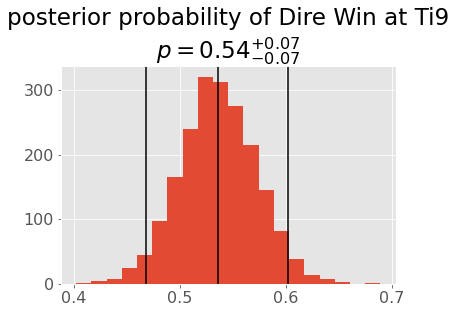

In [84]:
plt.figure()
plt.hist(trace["notp"], bins=20)
plt.axvline(notp_median, c='k')

plt.axvline(hdi_notp[0], c='k')
plt.axvline(hdi_notp[1], c='k')

b1=numpy.around(notp_median, 2)
b2=numpy.around(notp_median-hdi_notp[0], 2)
b3=numpy.around(hdi_notp[1]-notp_median, 2)

plt.title("posterior probability of Dire Win at Ti9\n" + fr"$p = {b1}^{{+{{{b2}}}}}_{{-{{{b3}}}}}$")

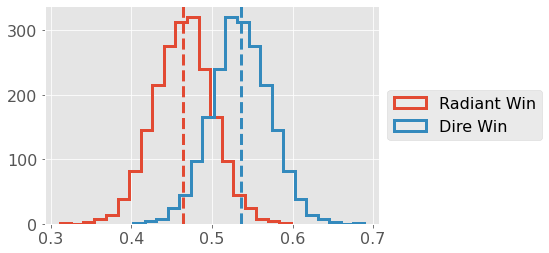

In [85]:
plt.figure()
plt.hist(trace["p"], bins=20, label='Radiant Win', histtype='step', lw=3)
plt.hist(trace["notp"], bins=20, label='Dire Win', histtype='step', lw=3)
plt.axvline(p_median, c='C0', lw=3, ls='--')
plt.axvline(notp_median, c='C1', lw=3, ls='--')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [86]:
numpy.testing.assert_array_equal((1-trace["p"]), trace["notp"])

# how to extend

In [ ]:
# lets follow a similar approach to the football example
# parameterise each team with an attack and defense value
# lets say that attack is the total number of kills
# and (negative) defense is something like how many deaths the other team concedes

In [87]:
from bs4 import BeautifulSoup

In [88]:
from urllib.request import urlopen

In [99]:
import json

In [153]:
class ParseMatchData(object):
    def __init__(self, matchid):
        self.matchid = matchid
        
        self.url = f"https://www.datdota.com/api/matches/{self.matchid}"
        
        html = urlopen(self.url)
        soup = BeautifulSoup(html,"html.parser")
        self.json_dict = json.loads(str(soup))
        
        self.get_total_radiant_kills()
        self.get_total_radiant_deaths()
        self.get_total_dire_kills()
        self.get_total_dire_deaths()
        
    def get_total_radiant_kills(self):
        # pps = player performances : list
        pps = self.json_dict['data']['radiant']['player_performances']
        self.total_radiant_kills = sum([pp['performance']['kills'] for pp in pps])
        
    def get_total_radiant_deaths(self):
        # pps = player performances : list
        pps = self.json_dict['data']['radiant']['player_performances']
        self.total_radiant_deaths = sum([pp['performance']['deaths'] for pp in pps])
        
    def get_total_dire_kills(self):
        # pps = player performances : list
        pps = self.json_dict['data']['dire']['player_performances']
        self.total_dire_kills = sum([pp['performance']['kills'] for pp in pps])
        
    def get_total_dire_deaths(self):
        # pps = player performances : list
        pps = self.json_dict['data']['dire']['player_performances']
        self.total_dire_deaths = sum([pp['performance']['deaths'] for pp in pps])

In [154]:
pmd = ParseMatchData(matchid=4986461644)

In [159]:
print(f"pmd.total_radiant_kills: {pmd.total_radiant_kills}")
print(f"pmd.total_radiant_deaths: {pmd.total_radiant_deaths}")
print(f"pmd.total_dire_kills: {pmd.total_dire_kills}")
print(f"pmd.total_dire_deaths: {pmd.total_dire_deaths}")

pmd.total_radiant_kills: 20
pmd.total_radiant_deaths: 12
pmd.total_dire_kills: 11
pmd.total_dire_deaths: 20


In [163]:
df["Match"][1]

4986362254

In [8]:
import tqdm

In [9]:
import time

In [171]:
# this took about 10mins
# total_radiant_kills=[]
# total_dire_kills=[]
# total_radiant_deaths=[]
# total_dire_deaths=[]

# for i in tqdm.tqdm(range(len(df))):
#     pmd = ParseMatchData(matchid=df["Match"][i])
#     total_radiant_kills.append(pmd.total_radiant_kills)
#     total_dire_kills.append(pmd.total_dire_kills)
#     total_radiant_deaths.append(pmd.total_radiant_deaths)
#     total_dire_deaths.append(pmd.total_dire_deaths)
    
#     time.sleep(1)
    
# total_radiant_kills = numpy.array(total_radiant_kills)
# total_dire_kills = numpy.array(total_dire_kills)
# total_radiant_deaths = numpy.array(total_radiant_deaths)
# total_dire_deaths = numpy.array(total_dire_deaths)

100%|██████████| 193/193 [10:46<00:00,  3.35s/it]


AttributeError: 'int' object has no attribute 'array'

In [174]:
# total_radiant_kills = numpy.array(total_radiant_kills)
# total_dire_kills = numpy.array(total_dire_kills)
# total_radiant_deaths = numpy.array(total_radiant_deaths)
# total_dire_deaths = numpy.array(total_dire_deaths)

In [257]:
df["total_radiant_kills"] = total_radiant_kills
df["total_radiant_deaths"] = total_radiant_deaths
df["total_dire_deaths"] = total_dire_deaths
df["total_dire_kills"] = total_dire_kills

In [258]:
# df.columns

In [261]:
# df.to_csv("updated_ti9.csv", index=False)

In [262]:
!ls

datdota_The_International_2019.csv updated_ti9.csv
dev.ipynb


In [6]:
df_prime = pd.read_csv("updated_ti9.csv")

In [7]:
df_prime

Match               Date  Duration         Team  \
0    4986461644  25 Aug 2019 01:50    1474.0           OG   
1    4986362254  25 Aug 2019 12:54    1403.0  Team Liquid   
2    4986260666  25 Aug 2019 11:51    1945.0  Team Liquid   
3    4986133311  25 Aug 2019 10:33    2914.0  Team Liquid   
4    4985891168  25 Aug 2019 08:12    2194.0      PSG.LGD   
..          ...                ...       ...          ...   
188  4967642360  15 Aug 2019 05:03    2092.0     Chaos EC   
189  4967602648  15 Aug 2019 04:03    2682.0  Team Secret   
190  4967601727  15 Aug 2019 04:02    2873.0  Team Liquid   
191  4967601481  15 Aug 2019 04:01    1667.0      PSG.LGD   
192  4967600837  15 Aug 2019 04:01    3193.0  KEEN GAMING   

                                                 Picks  \
0             Io  Tiny  Abaddon  Timbersaw  Gyrocopter   
1    Rubick  Tidehunter  Ogre Magi  Templar Assassi...   
2    Tidehunter  Templar Assassin  Shadow Shaman  L...   
3    Tidehunter  Chen  Rubick  Templar Assassin  Meepo   
4    Elder Titan  Rubick  Faceless Void  Shadow Fie...   
..                                                 ...   
188           Grimstroke  Dazzle  Tiny  Spectre  Lycan   
189  Kunkka  Jakiro  Elder Titan  Broodmother  Arc ...   
190     Beastmaster  Zeus  Alchemist  Ogre Magi  Viper   
191  Ogre Magi  Shadow Demon  Naga Siren  Jakiro  S...   
192  Ancient Apparition  Ember Spirit  Rubick  Life...   

                                                  Bans        Team.1  \
0    Leshrac  Dark Seer  Enchantress  Meepo  Ember ...   Team Liquid   
1    Magnus  Ancient Apparition  Io  Ember Spirit  ...            OG   
2    Magnus  Ancient Apparition  Io  Invoker  Dark ...            OG   
3    Magnus  Io  Alchemist  Invoker  Ember Spirit  ...            OG   
4    Alchemist  Chen  Enchantress  Io  Naga Siren  ...   Team Liquid   
..                                                 ...           ...   
188  Enchantress  Leshrac  Warlock  Naga Siren  Anc...       PSG.LGD   
189  Lina  Shadow Demon  Ancient Apparition  Slark ...      Alliance   
190  Omniknight  Enchantress  Leshrac  Chen  Timber...        Newbee   
191  Enchantress  Enigma  Chen  Broodmother  Lifest...      Chaos EC   
192  Chen  Enigma  Oracle  Outworld Devourer  Shado...  TNC Predator   

                                               Picks.1  \
0    Chen  Omniknight  Bristleback  Earth Spirit  W...   
1    Enchantress  Tiny  Grimstroke  Faceless Void  ...   
2    Grimstroke  Tiny  Ember Spirit  Omniknight  Mo...   
3      Enchantress   Elder Titan  Tiny  Spectre  Pugna   
4    Tidehunter  Templar Assassin  Shadow Shaman  W...   
..                                                 ...   
188  Elder Titan  Sand King  Mirana  Lifestealer  P...   
189  Ogre Magi  Dark Willow  Oracle  Death Prophet ...   
190  Mirana  Ember Spirit  Sven  Tidehunter  Ancien...   
191  Elder Titan  Grimstroke  Sven  Underlord  Necr...   
192  Mirana  Kunkka  Grimstroke  Bristleback  Arc W...   

                                                Bans.1        Winner  \
0    Magnus  Alchemist  Elder Titan  Troll Warlord ...            OG   
1    Leshrac  Alchemist  Chen  Meepo  Naga Siren  W...            OG   
2        Leshrac  Alchemist  Chen  Rubick  Meepo  Puck            OG   
3    Leshrac  Ancient Apparition  Sand King  Tusk  ...   Team Liquid   
4    Leshrac  Ogre Magi  Centaur Warrunner  Kunkka ...   Team Liquid   
..                                                 ...           ...   
188  Chen  Enigma  Shadow Demon  Alchemist  Broodmo...       PSG.LGD   
189  Enchantress  Techies  Alchemist  Naga Siren  E...   Team Secret   
190  Io  Broodmother  Magnus  Puck  Outworld Devour...        Newbee   
191  Leshrac  Mirana  Ancient Apparition  Alchemist...       PSG.LGD   
192  Ogre Magi  Enchantress  Alchemist  Tidehunter ...  TNC Predator   

     Duration_mins  radiantWin  total_radiant_kills  total_radiant_deaths  \
0        24.566667           1                   20                    12   

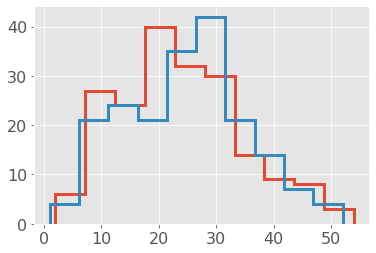

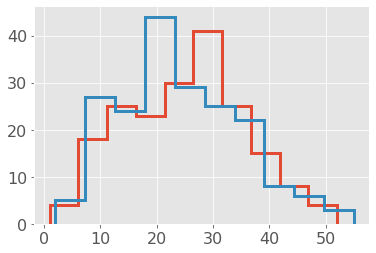

In [269]:
plt.figure()
plt.hist(df_prime['total_radiant_kills'], bins=10, histtype='step', lw=3);
plt.hist(df_prime['total_dire_kills'], bins=10, histtype='step', lw=3);

plt.figure()
plt.hist(df_prime['total_radiant_deaths'], bins=10, histtype='step', lw=3);
plt.hist(df_prime['total_dire_deaths'], bins=10, histtype='step', lw=3);

Text(0.5, 1.0, 'dire')

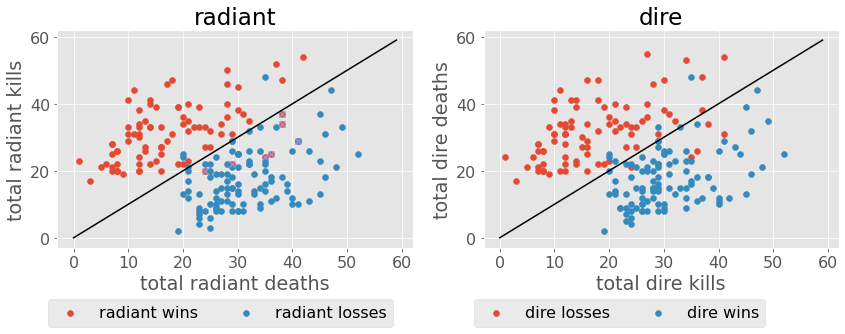

In [271]:
win_mask = df_prime['radiantWin']==1
lose_mask = df_prime['radiantWin']==0


radiant_win_kdr = df_prime['total_radiant_kills'][win_mask]/df_prime['total_radiant_deaths'][win_mask]
radiant_lose_kdr = df_prime['total_radiant_kills'][lose_mask]/df_prime['total_radiant_deaths'][lose_mask]

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.scatter(df_prime['total_radiant_deaths'][win_mask], df_prime['total_radiant_kills'][win_mask], label='radiant wins')
plt.scatter(df_prime['total_radiant_deaths'][lose_mask], df_prime['total_radiant_kills'][lose_mask], label='radiant losses')

plt.scatter(df_prime['total_radiant_deaths'][win_mask][radiant_win_kdr<1], df_prime['total_radiant_kills'][win_mask][radiant_win_kdr<1], marker='x')

plt.plot(range(60), range(60), c='k')

plt.xlabel("total radiant deaths")
plt.ylabel("total radiant kills")
plt.legend(loc='center left', bbox_to_anchor=(-0.05, -0.3), ncol=2)
plt.title("radiant")

dire_win_mask = df_prime['radiantWin']==0
dire_lose_mask = df_prime['radiantWin']==1

dire_win_kdr = df_prime['total_dire_kills'][dire_win_mask]/df_prime['total_dire_deaths'][dire_win_mask]
dire_lose_kdr = df_prime['total_dire_kills'][dire_lose_mask]/df_prime['total_dire_deaths'][dire_lose_mask]

plt.subplot(1,2,2)
plt.scatter(df_prime['total_dire_kills'][dire_lose_mask], df_prime['total_dire_deaths'][dire_lose_mask], label='dire losses')
plt.scatter(df_prime['total_dire_kills'][dire_win_mask], df_prime['total_dire_deaths'][dire_win_mask], label='dire wins')

# plt.scatter(df_prime['total_dire_deaths'][dire_win_mask][dire_win_kdr>1], df_prime['total_dire_kills'][dire_win_mask][dire_win_kdr>1], marker='x')

plt.plot(range(60), range(60), c='k')

plt.ylabel("total dire deaths")
plt.xlabel("total dire kills")
plt.legend(loc='center left', bbox_to_anchor=(-0.05, -0.3), ncol=2)
plt.title("dire")

In [298]:
radiant_win_kdr<1

0      False
3      False
5      False
8      False
9       True
       ...  
184    False
186    False
187    False
189     True
191    False
Length: 89, dtype: bool

In [335]:
dire_win_kdr[dire_win_kdr<1]

69     0.913043
120    0.833333
132    0.800000
136    0.878788
149    0.729167
dtype: float64

In [337]:
radiant_win_kdr[radiant_win_kdr<1]

9      0.758621
43     0.833333
110    0.973684
140    0.707317
162    0.894737
172    0.685714
189    0.694444
dtype: float64

In [339]:
df_prime["total_radiant_kills"][110]

37

In [340]:
df_prime.iloc[110]

Match                                                          4970923784
Date                                                    17 Aug 2019 03:16
Duration                                                           3571.0
Team                                                               Newbee
Picks                            Gyrocopter  Chen  Axe  Rubick  Anti-Mage
Bans                    Broodmother  Shadow Demon  Crystal Maiden  Kun...
Team.1                                                           Alliance
Picks.1                 Ancient Apparition  Morphling  Tusk  Sand King...
Bans.1                  Mirana  Enchantress  Ogre Magi  Outworld Devou...
Winner                                                             Newbee
Duration_mins                                                   59.516667
radiantWin                                                              1
total_radiant_kills                                                    37
total_radiant_deaths                  

In [342]:
df_prime["total_radiant_kills"][110]

37

In [343]:
df_prime["total_radiant_deaths"][110]

38

In [341]:
df_prime["total_radiant_kills"][110]/df_prime["total_radiant_deaths"][110]

0.9736842105263158

In [330]:
numpy.concatenate([df_prime[win_mask][radiant_win_kdr<1].index, df_prime[dire_win_mask][dire_win_kdr<1].index])

array([  9,  43, 110, 140, 162, 172, 189,  69, 120, 132, 136, 149])

In [329]:
df_prime[dire_win_mask][dire_win_kdr<1].index

Int64Index([69, 120, 132, 136, 149], dtype='int64')

In [ ]:
# for example the first game in this list
# is this one
# https://youtu.be/I-3X4Q9yZkg?list=PLDR777IN7japyAfdgswpb6AVkB9FUEdDx&t=9714
# OG vs PSG.LGD game 3 - watching it.
# watched it - it was technically a game where LGD were winning and then OG came back
# but OG had a alchemist and so the networth was a little skewed.

In [338]:
# list of all matches where RADIANT won but had more deaths than kills (negative KDR)
# also includes 
# list of all matches where DIRE won but had more deaths than kills (negative KDR)
# these games might be candidates for COMEBACK games
df_prime.iloc[
    numpy.concatenate([df_prime[win_mask][radiant_win_kdr<1].index, df_prime[dire_win_mask][dire_win_kdr<1].index])
]

Match               Date  Duration                 Team  \
9    4983800597  24 Aug 2019 08:45    2509.0                   OG   
43   4977207666  20 Aug 2019 12:12    2597.0  Royal Never Give Up   
110  4970923784  17 Aug 2019 03:16    3571.0               Newbee   
140  4969319314  16 Aug 2019 06:24    4071.0               Newbee   
162  4968129116  15 Aug 2019 01:06    3787.0             Chaos EC   
172  4967893095  15 Aug 2019 09:49    3367.0          Team Secret   
189  4967602648  15 Aug 2019 04:03    2682.0          Team Secret   
69   4972915024  18 Aug 2019 03:16    2440.0  Royal Never Give Up   
120  4969729714  16 Aug 2019 12:41    2183.0               Fnatic   
132  4969485474  16 Aug 2019 09:17    1801.0    Ninjas in Pyjamas   
136  4969402562  16 Aug 2019 07:58    3594.0          Vici Gaming   
149  4969187966  16 Aug 2019 03:18    3817.0        Natus Vincere   

                                                 Picks  \
9    Chen  Alchemist  Tidehunter  Rubick  Legion Co...   
43   Leshrac  Abaddon  Shadow Demon  Ember Spirit  ...   
110           Gyrocopter  Chen  Axe  Rubick  Anti-Mage   
140  Ogre Magi  Gyrocopter  Crystal Maiden  Invoker...   
162  Shadow Demon  Sand King  Silencer  Spectre  Dr...   
172  Crystal Maiden  Naga Siren  Dark Willow  Ogre ...   
189  Kunkka  Jakiro  Elder Titan  Broodmother  Arc ...   
69   Enchantress  Lifestealer  Ancient Apparition  ...   
120  Ogre Magi  Mirana  Gyrocopter  Sand King  Invoker   
132   Mirana  Ogre Magi  Lion  Lone Druid  Wraith King   
136  Elder Titan  Shadow Demon  Centaur Warrunner  ...   
149  Alchemist  Oracle  Elder Titan  Sand King  Bro...   

                                                  Bans           Team.1  \
9    Ancient Apparition  Leshrac  Ogre Magi  Lifest...          PSG.LGD   
43   Lina  Morphling  Enigma  Ancient Apparition  B...         Alliance   
110  Broodmother  Shadow Demon  Crystal Maiden  Kun...         Alliance   
140  Shadow Demon  Enchantress  Chen  Alchemist  Wa...          PSG.LGD   
162  Ancient Apparition  Ogre Magi  Oracle  Juggern...         Alliance   
172  Alchemist  Legion Commander  Sand King  Gyroco...           Newbee   
189  Lina  Shadow Demon  Ancient Apparition  Slark ...         Alliance   
69   Magnus  Tiny  Mirana  Timbersaw  Ember Spirit ...           Fnatic   
120  Alchemist  Magnus  Nyx Assassin  Broodmother  ...  Infamous Gaming   
132  Chen  Magnus  Enchantress  Spectre  Invoker  W...               OG   
136  Magnus  Enchantress  Alchemist  Warlock  Puck ...  Infamous Gaming   
149  Tiny  Silencer  Enchantress  Monkey King  Quee...  Infamous Gaming   

                                               Picks.1  \
9    Elder Titan  Tiny  Shadow Demon  Sand King  Slark   
43   Dark Willow  Faceless Void  Crystal Maiden  St...   
110  Ancient Apparition  Morphling  Tusk  Sand King...   
140  Elder Titan  Leshrac  Rubick  Centaur Warrunne...   
162  Crystal Maiden  Storm Spirit  Enigma  Centaur ...   
172  Mirana  Ember Spirit  Jakiro  Lifestealer  Und...   
189  Ogre Magi  Dark Willow  Oracle  Death Prophet ...   
69   Ogre Magi  Gyrocopter  Shadow Shaman  Abaddon ...   
120  Leshrac  Enchantress  Tiny  Wraith King  Windr...   
132  Shadow Demon  Earthshaker  Elder Titan  Io  Tr...   
136  Tidehunter  Tiny  Lifestealer  Legion Commande...   
149     Magnus  Slark  Shadow Demon  Lifestealer  Tusk   

                                                Bans.1               Winner  \
9    Io  Enchantress  Magnus  Dark Seer  Invoker  D...                   OG   
43   Enchantress  Elder Titan  Mirana  Wraith King ...  Royal Never Give Up   
110  Mirana  Enchantress  Ogre Magi  Outworld Devou...               Newbee   
140  Io  Mirana  Beastmaster  Kunkka  Visage  Outwo...               Newbee   
162  Chen  Enchantress  Dazzle  Batrider  Alchemist...             Chaos EC   
172  Leshrac  Kunkka  Techies  Puck  Omniknight  Ou...          Team Secret   
189  Enchantress  Techies  Alchemist  Naga Siren  E...          Team Secr

In [311]:
df_prime['total_radiant_deaths'][win_mask]

0      12
3      24
5      29
8       8
9      29
       ..
184    10
186    15
187     8
189    36
191     7
Name: total_radiant_deaths, Length: 89, dtype: int64

In [322]:
df_prime['total_radiant_deaths'][win_mask][df_prime['total_radiant_deaths'][win_mask][radiant_win_kdr<1].index]

9      29
43     24
110    38
140    41
162    38
172    35
189    36
Name: total_radiant_deaths, dtype: int64

In [247]:
# the total kills vs total deaths parameter space shows a clear separation for win/loss
# would be easy to build a classifer to predict win/loss.

# interesting the there is basically no matches with < 20 kill/deaths

# black line is y=x
# this is a pretty good classifer on it's own tbh.
# if a team wins and is above y=x then you could say that that game was a come back?
# and if it is below then the game was a throw?

# parameterising teams with "attack" and "defence"

In [ ]:
# a team with a high attack is one which gets alot of kills

# a team with high defence is one which doesn't concede a lot of deaths?

# e.g.

# team A 24 : 0 team B
# team A has high attack and high defence
# team B has low attack and low defence

# team A 24 : 24 team B
# team A has high attack and high defence
# team B has high attack and high defence

# team A 24 : 12 team B
# team A has high attack and medium defence
# team B has medium attack and medium defence

# etc

In [12]:
teams = df_prime["Team"].unique()

In [13]:
# number of teams
nt = len(teams)

In [15]:
# number of games
ng = len(df_prime)

In [16]:
print(f"nt: {nt}")
print(f"ng: {ng}")

nt: 18
ng: 193


In [18]:
df_prime.columns

Index(['Match', 'Date', 'Duration', 'Team', 'Picks', 'Bans', 'Team.1',
       'Picks.1', 'Bans.1', 'Winner', 'Duration_mins', 'radiantWin',
       'total_radiant_kills', 'total_radiant_deaths', 'total_dire_deaths',
       'total_dire_kills'],
      dtype='object')

In [20]:
# convert team names for each match into numbers

# for each team we assign an integer
# this dictionary is a map between the team name and it's number
team_number_dict = {k:i for i, k in enumerate(teams)}


# this is from ../hierarchical-premier-league/dev.ipynb
# home team will be radient
# away team will be dire

# "Team" col is radient
# "Team.1" col is dire


# home team index
# will be an array of length ng (number of games)
# it indexes which team played home in each game
ht = []
for home_team in df_prime["Team"]:
    ht.append(team_number_dict[home_team])
ht = numpy.array(ht)

# same for away team
# it indexes which team played away in each game
at = []
for away_team in df_prime["Team.1"]:
    at.append(team_number_dict[away_team])
at = numpy.array(at)

In [53]:
# set up data
# we will reserve the last 5 elements for prediction/testing

ng = len(df_prime)

n_pred = 5
ngob = ng - n_pred

datadict = {}

# number of predictions
datadict['n_pred'] = n_pred
datadict['ngob'] = ngob
datadict['nt'] = nt
datadict['ng'] = ng
datadict['ht'] = ht[:ngob]
datadict['at'] = at[:ngob]
datadict['radiantWin'] = df_prime["radiantWin"][:ngob].to_numpy()
datadict['htnew'] = ht[ngob:]
datadict['atnew'] = at[ngob:]


datadict["total_radiant_kills"] = df_prime["total_radiant_kills"][:ngob].to_numpy()
datadict["total_dire_kills"] = df_prime["total_dire_kills"][:ngob].to_numpy()

In [54]:
datadict

{'n_pred': 5,
 'ngob': 188,
 'nt': 18,
 'ng': 193,
 'ht': array([ 0,  1,  1,  1,  2,  1,  1,  3,  1,  0,  2,  0,  3,  4,  1,  1,  3,
         5,  1,  6,  0,  0,  7,  4,  4,  8,  8,  8,  9,  5,  9,  1, 10,  6,
         6,  3,  7,  3,  9,  9, 11, 12,  1,  6, 10, 10, 10, 13,  2,  0, 14,
         4,  6, 15, 14,  6, 10, 15, 16,  9,  3,  2,  1,  8, 17, 15,  4,  7,
        14,  6, 13, 11,  5,  3,  1,  3,  9,  8, 15,  9, 12, 16, 15,  6, 14,
         5, 11,  4, 13, 10, 16, 12,  8,  1, 10,  3,  9, 13, 14,  5, 15, 13,
        14, 15,  5, 16, 10,  2, 17,  8,  9, 12, 10,  7,  6, 11, 15,  4, 14,
         6, 15,  1,  9, 16,  8, 12,  1, 10, 17, 11,  6,  4, 14,  7, 14, 13,
         4, 16,  1, 12,  9,  1,  3, 16,  9, 14, 11, 13,  0, 11, 15,  0,  4,
        10, 12,  8, 10, 17,  1, 15,  3,  7, 17,  4,  0, 13, 11,  9,  5,  8,
         6,  1,  3, 12, 10,  1, 12, 11, 14,  4, 15, 11, 13,  6, 15, 12,  9,
         3]),
 'at': array([ 1,  0,  0,  0,  1,  2,  2,  1,  3,  2,  0,  2,  4,  3,  7,  7,  5,
         3,

In [96]:
# based on https://docs.pymc.io/notebooks/rugby_analytics.html#Building-of-the-model
with pm.Model() as model:
    
    # global model parameters
#     dire_adv = pm.Uniform("dire_adv", 0, 1)
    intercept = pm.Flat("intercept")
    sd_att = pm.HalfStudentT("sd_att", nu=3, sigma=2.5)
    sd_def = pm.HalfStudentT("sd_def", nu=3, sigma=2.5)
    
    # team-specific model parameters
    atts_star = pm.Normal("atts_star", mu=0, sigma=sd_att, shape=datadict["nt"])
    defs_star = pm.Normal("defs_star", mu=0, sigma=sd_def, shape=datadict["nt"])
    
    atts = pm.Deterministic("atts", atts_star - tt.mean(atts_star))
    defs = pm.Deterministic("defs", defs_star - tt.mean(defs_star))
    
#     p = tt.nnet.sigmoid(intercept + dire_adv + atts[datadict["ht"]] - defs[datadict["at"]])
    
    # likelihood of observed data
#     rad_win_likelihood = pm.Bernoulli("rad_win_likelihood", p=p, observed=datadict["radiantWin"])
    
    # or we could model the number of kills on each team and then it's literally the
    # same as the football example
    
#     radiant_kills_theta = tt.exp(intercept + atts[datadict["ht"]] - defs[datadict["at"]])
#     dire_kills_theta = tt.exp(intercept + dire_adv + atts[datadict["at"]] - defs[datadict["ht"]])
    radiant_kills_theta = tt.exp(intercept + atts[datadict["ht"]] - defs[datadict["at"]])
    dire_kills_theta = tt.exp(intercept + atts[datadict["at"]] - defs[datadict["ht"]])
    
    # likelihood of observed data
    radiant_kills = pm.Poisson("radiant_kills", mu=radiant_kills_theta, observed=datadict["total_radiant_kills"])
    dire_kills = pm.Poisson("dire_kills", mu=dire_kills_theta, observed=datadict["total_dire_kills"])    

In [97]:
with model:
    trace = pm.sample(1000, tune=1000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [defs_star, atts_star, sd_def, sd_att, intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 10 seconds.


/Users/spx8sk/anaconda3/envs/bayesian-hackers/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


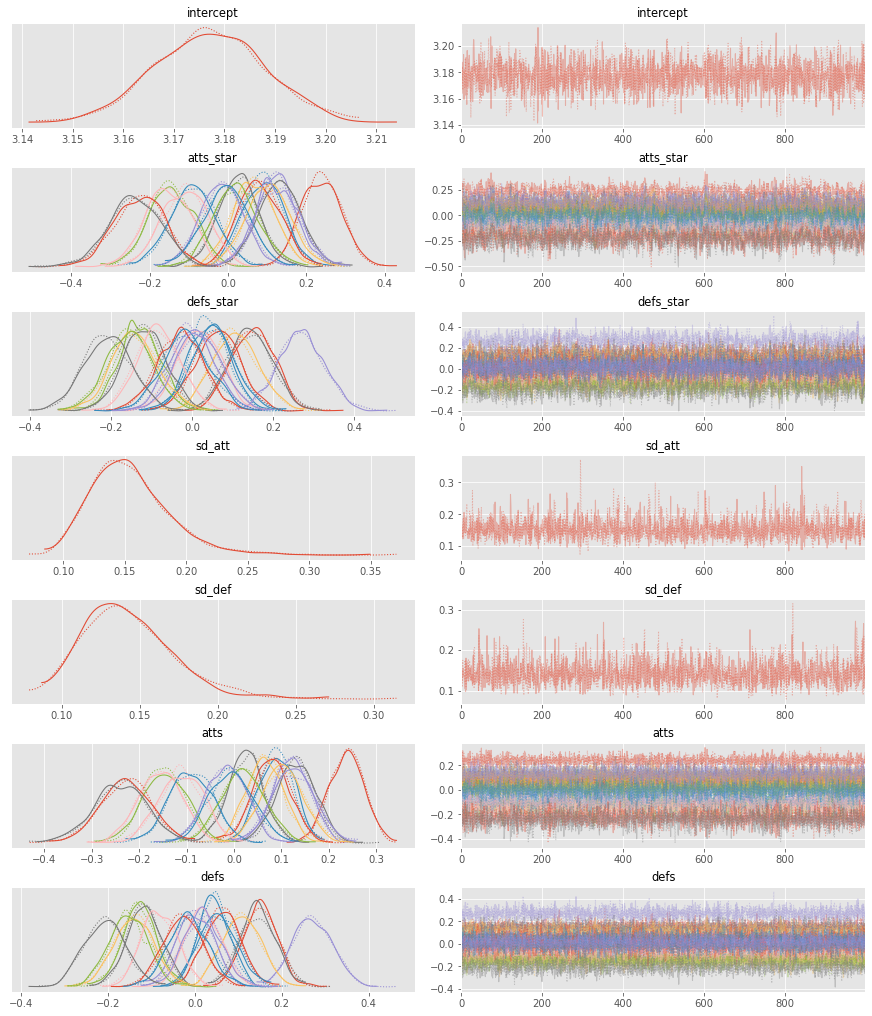

In [98]:
pm.traceplot(trace);

In [99]:
az.summary(trace)

/Users/spx8sk/anaconda3/envs/bayesian-hackers/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
intercept     3.177  0.011   3.157    3.198      0.000    0.000    2848.0   
atts_star[0]  0.239  0.051   0.149    0.337      0.002    0.001     722.0   
atts_star[1]  0.091  0.052  -0.012    0.183      0.002    0.002     684.0   
atts_star[2]  0.124  0.052   0.032    0.232      0.002    0.001     794.0   
atts_star[3]  0.026  0.053  -0.071    0.129      0.002    0.001     795.0   
...             ...    ...     ...      ...        ...      ...       ...   
defs[13]     -0.082  0.042  -0.159   -0.004      0.001    0.001    4283.0   
defs[14]     -0.028  0.045  -0.113    0.058      0.001    0.001    4645.0   
defs[15]     -0.014  0.046  -0.100    0.074      0.001    0.001    4470.0   
defs[16]      0.017  0.045  -0.068    0.101      0.001    0.001    4267.0   
defs[17]     -0.207  0.048  -0.301   -0.125      0.001    0.001    3908.0   

              ess_sd  ess_bulk  ess_tail  r_hat  
intercept     2844.0    2819.0    1613.0    1.0  
atts_star[0]   687.0     726.0     973.0    1.0  
atts_star[1]   599.0     693.0     754.0    1.0  
atts_star[2]   736.0     805.0     976.0    1.0  
atts_star[3]   790.0     795.0     970.0    1.0  
...              ...       ...       ...    ...  
defs[13]      3178.0    4356.0    1638.0    1.0  
defs[14]      1384.0    4657.0    1571.0    1.0  
defs[15]      1020.0    4477.0    1554.0    1.0  
defs[16]      1263.0    4265.0    1902.0    1.0  
defs[17]      3908.0    4024.0    1617.0    1.0  

[75 rows x 11 columns]

In [100]:
bfmi = max(pm.stats.bfmi(trace))
max_gr = max(numpy.max(gr_stats) for gr_stats in pm.stats.rhat(trace).values()).values

/Users/spx8sk/anaconda3/envs/bayesian-hackers/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


/Users/spx8sk/anaconda3/envs/bayesian-hackers/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


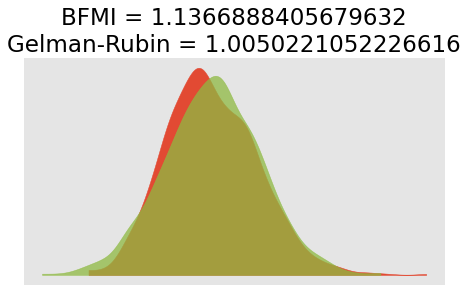

In [101]:
(
    pm.energyplot(trace, legend=False, figsize=(6, 4)).set_title(
        f"BFMI = {bfmi}\nGelman-Rubin = {max_gr}"
    )
);

In [102]:
import arviz as az

In [103]:
hpd_atts = az.stats.hdi(trace["atts"])
hpd_defs = az.stats.hdi(trace["defs"])

/Users/spx8sk/anaconda3/envs/bayesian-hackers/lib/python3.7/site-packages/arviz/stats/stats.py:496: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


In [104]:
hpd_atts[:,0]

array([ 0.1725791 ,  0.02158633,  0.05101542, -0.04779215, -0.00734673,
       -0.23508405, -0.24747187,  0.00661157, -0.1760483 , -0.09729001,
        0.05667991,  0.02106081, -0.06467854, -0.19721893, -0.33365941,
       -0.09022399,  0.04181005, -0.3439768 ])

In [105]:
hpd_defs.shape

(18, 2)

In [106]:
team_number_dict["OG"]

0

In [107]:
numpy.quantile(trace["atts"][0], 0.5)

0.03730449039370655

Text(0.5, 1.0, 'Attack and Defence for Ti9')

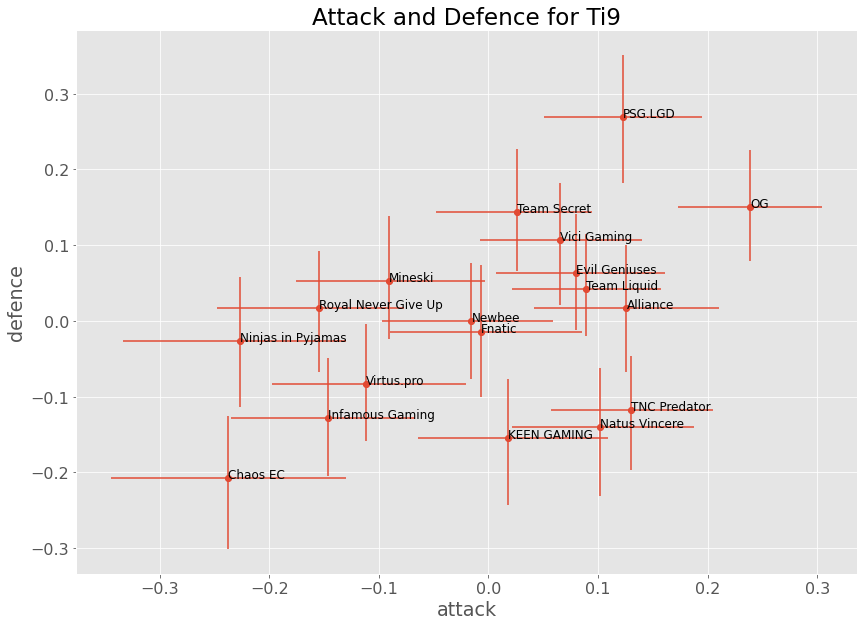

In [124]:
xx = numpy.quantile(trace["atts"], 0.5, axis=0)
yy = numpy.quantile(trace["defs"], 0.5, axis=0)

# xx_err = np.diff(hpd_atts, axis=1).reshape(-1)
# yy_err = np.diff(hpd_defs, axis=1).reshape(-1)

xx_err = [xx-hpd_atts[:,0], hpd_atts[:,1]-xx]
yy_err = [yy-hpd_defs[:,0], hpd_defs[:,1]-yy]


plt.figure(figsize=(14,10))
plt.errorbar(xx, yy, xerr=xx_err, yerr=yy_err, fmt="o")
plt.scatter(xx, yy)

for i, team in enumerate(teams):
    plt.annotate(team, (xx[i], yy[i]), fontsize=12)

plt.xlabel("attack")
plt.ylabel("defence")

plt.title("Attack and Defence for Ti9")

In [127]:
print("Team \t attack+defence")
for i in range(len(xx)):
    print(teams[i], (xx[i]+yy[i]))

Team 	 attack+defence
OG 0.38961740994681615
Team Liquid 0.13183398959300077
PSG.LGD 0.3913615811109397
Team Secret 0.17031530496168662
Vici Gaming 0.17164104396068125
Infamous Gaming -0.2751168916003796
Royal Never Give Up -0.13717587737550413
Evil Geniuses 0.14386887469120496
Mineski -0.0376501840805712
Newbee -0.015799967785987204
TNC Predator 0.01302395563372763
Natus Vincere -0.03842057715411648
KEEN GAMING -0.1361222501668716
Virtus.pro -0.19451423206455007
Ninjas in Pyjamas -0.25391921269870743
Fnatic -0.021645517231361704
Alliance 0.1435706747094807
Chaos EC -0.4449385721933976


In [133]:
new_df = pd.DataFrame(numpy.array([teams, (xx+yy)]).T, columns=["Team", "attack+defense"])

In [139]:
new_df.sort_values(by="attack+defense", ascending=False)

Team attack+defense
2               PSG.LGD       0.391362
0                    OG       0.389617
4           Vici Gaming       0.171641
3           Team Secret       0.170315
7         Evil Geniuses       0.143869
16             Alliance       0.143571
1           Team Liquid       0.131834
10         TNC Predator       0.013024
9                Newbee        -0.0158
15               Fnatic      -0.021646
8               Mineski       -0.03765
11        Natus Vincere      -0.038421
12          KEEN GAMING      -0.136122
6   Royal Never Give Up      -0.137176
13           Virtus.pro      -0.194514
14    Ninjas in Pyjamas      -0.253919
5       Infamous Gaming      -0.275117
17             Chaos EC      -0.444939